In [257]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

os.chdir('data')

biden = pd.read_csv('biden_tweets.csv')
biden['candidate'] = 'Biden'

booker = pd.read_csv('booker_tweets.csv')
booker['candidate'] = 'Booker'


buttig = pd.read_csv('buttigieg_tweets.csv')
buttig['candidate'] = 'Buttigieg'

dnc = pd.read_csv('dem_deb_tweets.csv')
dnc['candidate'] = 'DNC'

gabbard = pd.read_csv('gabbard_tweets.csv')
gabbard['candidate'] = 'Gabbard'

klob = pd.read_csv('klobuchar_tweets.csv')
klob['candidate'] = 'Klobuchar'

sanders = pd.read_csv('sanders_tweets.csv')
sanders['candidate']='Sanders'

steyer = pd.read_csv('steyer_tweets.csv')
steyer['candidate']='Steyer'

warren = pd.read_csv('warren_tweets.csv')
warren['candidate'] = 'Warren'

yang = pd.read_csv('yang_tweets.csv')
yang['candidate'] = 'Yang'


dems = pd.concat([biden, booker, buttig, dnc, gabbard, klob, sanders, steyer, warren, yang], axis=0, sort=False)

del biden, booker, buttig, dnc, gabbard, klob, sanders, steyer, warren, yang

#dems.to_csv('full_dems.csv')
"""keep the """
dems=dems.sort_values('retweet_count', ascending=False)
dems = dems.drop_duplicates(subset=['clean_text'], keep='first')
#dems.drop_duplicates(['original_text', 'clean_text', 'sentiment', 'polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'hashtags', 'user_mentions', 'candidate', 'day'])


"""convert columns to strings"""
temp_list = []
for value in dems['clean_text']:
    value = str(value)
    temp_list.append(value)

dems['clean_text'] = temp_list
dems['clean_text'] = dems['clean_text'].str.lower()


temp_list = []
for value in dems['hashtags']:
    value = str(value)
    temp_list.append(value)
    
dems['hashtags'] = temp_list
dems['hashtags'] = dems['hashtags'].str.lower()


"""replace nan variables with 0 """
dems['favorite_count'] = dems['favorite_count'].fillna(0)
dems['retweet_count'] = dems['retweet_count'].fillna(0)
#####

dems = shuffle(dems, random_state=0)
dems = dems.drop(columns=['blank_check'], axis=1)

## change datetime column
dems['created_at'] = pd.to_datetime(dems['created_at'])
dems['day'] = dems['created_at'].apply(lambda x: x.date())
print(dems.shape)
dems.head(2)

(60953, 12)


,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day
38793,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03
50696,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02


In [356]:
X = np.array(dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].dropna(axis=0))

In [361]:
X = X.astype(np.long).reshape(60208,4)

In [373]:
np.asmatrix(X).shape

(60208, 4)

In [372]:
print(np.corrcoef(X[:, 0], X[:, 1])[1][0])
print(np.corrcoef(X[:, 0], X[:, 2])[1][0])
print(np.corrcoef(X[:, 0], X[:, 3])[1][0])
print(np.corrcoef(X[:, 1], X[:, 2])[1][0])
print(np.corrcoef(X[:, 1], X[:, 3])[1][0])
print(np.corrcoef(X[:, 2], X[:, 3])[1][0])

0.0843320100073057
-0.003407317646882132
-0.006065573853396898
-0.007364431318106623
-0.0007710536346502911
0.08222982857198614


In [355]:
dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'user_mentions']].dropna(axis=0).to_csv('red_dem.csv')

In [253]:
# dems.drop_duplicates(['original_text', 'clean_text', 'sentiment', 'polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'hashtags', 'user_mentions', 'candidate', 'day']).shape

(93112, 12)

In [258]:
cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']
cand_nums = pd.DataFrame([i for i in enumerate(cand_list)])

In [259]:
"""merge with numbers df"""
dems = pd.merge(dems, cand_nums, left_index=False, right_index=False, left_on='candidate', right_on=1)
dems = dems.drop(1, axis=1)
temp_list = list(dems.columns[:-1])
temp_list.append('cand_num')
dems.columns = temp_list
dems.head(2)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


In [261]:
biden.shape

(7097, 13)

### Polarity is a measure of emotion (-negative, neutral, positive)

In [260]:
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

In [92]:
# dems['candidate'].value_counts()

### plot the likes accross time

##### favorite_count 

In [269]:
# cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']
# temp_term = ['day', 'candidate', 'favorite_count']

In [270]:
# temp_biden = biden[temp_term].groupby(['day']).agg('sum')
# temp_booker = booker[temp_term].groupby(['day']).agg('sum')
# temp_buttig = buttig[temp_term].groupby(['day']).agg('sum')
# temp_dnc = dnc[temp_term].groupby(['day']).agg('sum')
# temp_gabbard = gabbard[temp_term].groupby(['day']).agg('sum')
# temp_klob = klob[temp_term].groupby(['day']).agg('sum')
# temp_sanders = sanders[temp_term].groupby(['day']).agg('sum')
# temp_steyer = steyer[temp_term].groupby(['day']).agg('sum')
# temp_warren = warren[temp_term].groupby(['day']).agg('sum')
# temp_yang = yang[temp_term].groupby(['day']).agg('sum')
# """concatenate"""
# temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
# temp_dem.columns = cand_list

# temp_dem

In [268]:
# temp_dem.plot(kind='line')
# plt.ylim(0, 200000)
# plt.xticks(rotation=45)
# plt.show()

##### retweet count

In [267]:
# cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']
# temp_term = ['day', 'candidate', 'retweet_count']

In [266]:
# temp_biden = biden[temp_term].groupby(['day']).agg('sum')
# temp_booker = booker[temp_term].groupby(['day']).agg('sum')
# temp_buttig = buttig[temp_term].groupby(['day']).agg('sum')
# temp_dnc = dnc[temp_term].groupby(['day']).agg('sum')
# temp_gabbard = gabbard[temp_term].groupby(['day']).agg('sum')
# temp_klob = klob[temp_term].groupby(['day']).agg('sum')
# temp_sanders = sanders[temp_term].groupby(['day']).agg('sum')
# temp_steyer = steyer[temp_term].groupby(['day']).agg('sum')
# temp_warren = warren[temp_term].groupby(['day']).agg('sum')
# temp_yang = yang[temp_term].groupby(['day']).agg('sum')
# """concatenate"""
# temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
# temp_dem.columns = cand_list

# temp_dem

In [265]:
# temp_dem.plot(kind='line', figsize=(10,10))
# #plt.ylim(0, 300000)
# plt.xticks(rotation=45)
# plt.show()

### Overall Sentiment

In [191]:
# temp_dems = dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count', 'cand_num']]
# temp_dems.head()

,polarity,subjectivity,favorite_count,retweet_count,cand_num
0,0.083333,0.144444,0,148,9
1,-0.100000,0.950000,0,129,9
2,0.000000,0.000000,0,349,9
3,0.000000,0.000000,0,504,9
4,0.150000,0.411111,0,472,9


In [43]:
#np.corrcoef(np.array(dems[['polarity']]), np.array(dems[['subjectivity']]))

In [192]:
# cand_nums = pd.DataFrame([i for i in enumerate(cand_list)])
# cand_nums

In [189]:
#pd.merge(dems, cand_nums, left_index=False, right_index=False, left_on='candidate', right_on=1)

In [16]:
np.array(dems[['cand_num']]).reshape(len(dems), )

array([9, 9, 9, ..., 3, 3, 3], dtype=int64)

In [26]:
np.corrcoef(np.array(X)[:, 0], np.array(X)[:, 1])

array([[1.        , 0.30634605],
       [0.30634605, 1.        ]])

In [27]:
np.corrcoef(np.array(X)[:, 0], np.array(X)[:, 2])


array([[1.        , 0.00285811],
       [0.00285811, 1.        ]])

In [28]:
np.corrcoef(np.array(X)[:, 0], np.array(X)[:, 3])

array([[ 1.        , -0.17880401],
       [-0.17880401,  1.        ]])

In [29]:
np.corrcoef(np.array(X)[:, 1], np.array(X)[:, 2])

array([[1.        , 0.00673878],
       [0.00673878, 1.        ]])

In [31]:
np.corrcoef(np.array(X)[:, 1], np.array(X)[:, 3])

array([[ 1.        , -0.01369254],
       [-0.01369254,  1.        ]])

In [32]:
np.corrcoef(np.array(X)[:, 2], np.array(X)[:, 3])

array([[1.0000000e+00, 4.1332503e-04],
       [4.1332503e-04, 1.0000000e+00]])

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

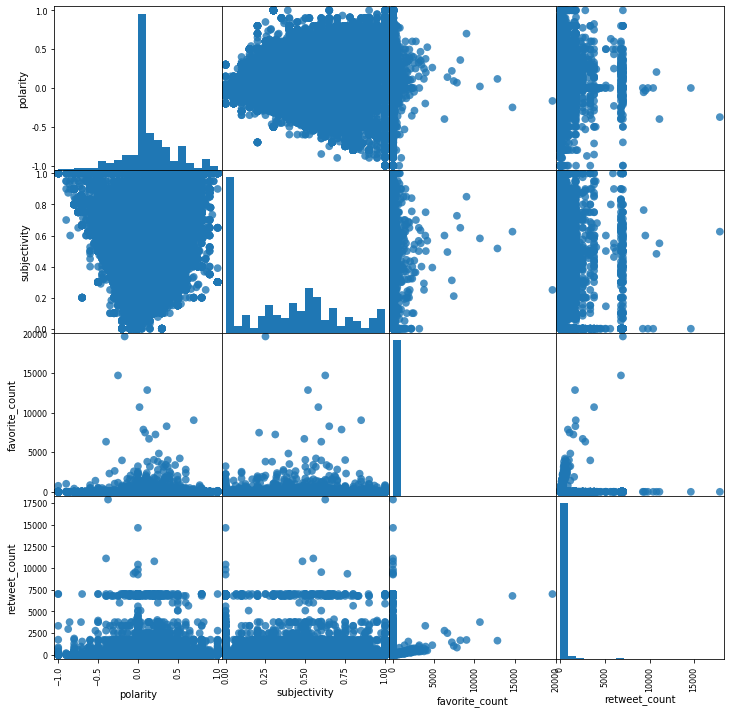

In [271]:
#X = dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']]
#y = np.array(dems[['cand_num']])

grr = pd.plotting.scatter_matrix(dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']], #c=np.array(dems[['cand_num']]).reshape(len(dems), ),
                                 figsize=(12, 12), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

In [197]:
# sns.pairplot(dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']], hue='cand_list', height=2.5)
# plt.show()

### lets Bin up Polarity / Subjectivity / favorites / retweets

## polarity

count    60208.000000
mean         0.118126
std          0.290073
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.255682
max          1.000000
Name: polarity, dtype: float64


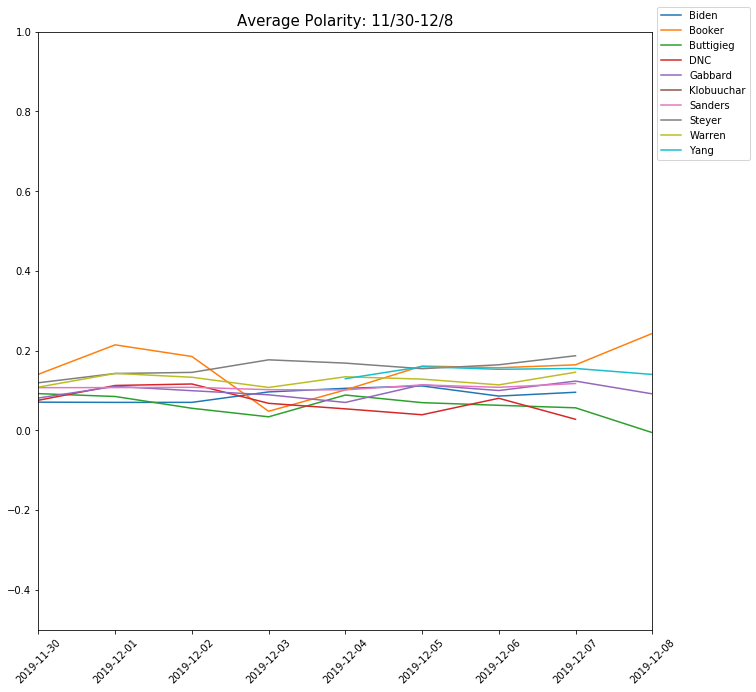

In [331]:
temp_term = ['day', 'candidate', 'polarity']
metric = 'mean'
print(dems['polarity'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure(figsize=(15,15))
temp_dem.plot(kind='line', legend=False, figsize=(11,11))
plt.ylim(-0.5, 1)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.title('Average Polarity: 11/30-12/8', fontsize=15)
plt.savefig('charts\\polarity_all.png')
plt.show()

In [274]:
time0 = time()
bins = np.arange(-1, 1.1, 0.1)
#df['binned'] = 
dems['polarity_bins'] = pd.cut(dems['polarity'], bins=bins)#, labels=labels)
#dems['polarity_bins'] = pd.Series([str(dems['polarity_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()
#dems.head(1)

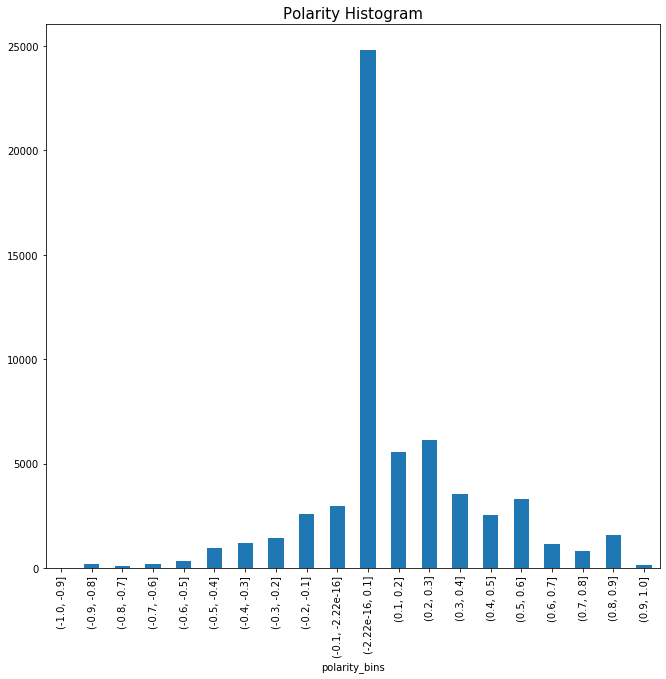

In [343]:
dems.groupby(['polarity_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Polarity Histogram', fontsize=15)
plt.savefig('charts\\polarity_hist_all.png')
plt.show()

In [276]:
dems['polarity_bins'].value_counts().iloc[:5]

(-2.22e-16, 0.1]    24802
(0.2, 0.3]           6112
(0.1, 0.2]           5534
(0.3, 0.4]           3524
(0.5, 0.6]           3310
Name: polarity_bins, dtype: int64

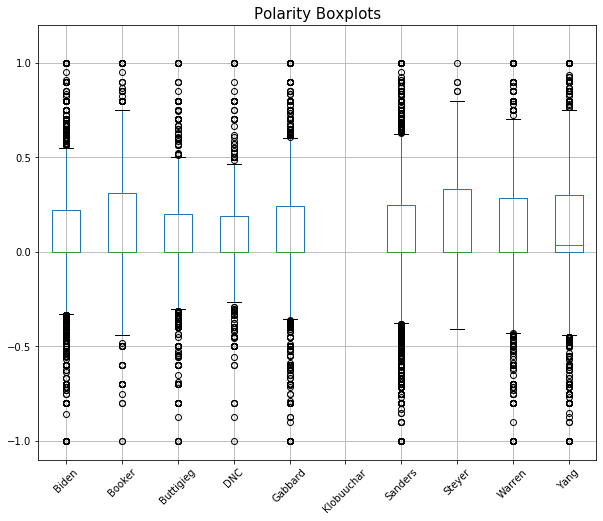

In [279]:
temp_term = ['polarity']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-1.1, 1.2)
plt.xticks(rotation=45)
plt.title('Polarity Boxplots', fontsize=15)
plt.savefig('charts\\polarity_box_all.png')
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.show()

## subjectivity

count    60208.000000
mean         0.361935
std          0.314634
min          0.000000
25%          0.000000
50%          0.375000
75%          0.600000
max          1.000000
Name: subjectivity, dtype: float64


<Figure size 432x288 with 0 Axes>

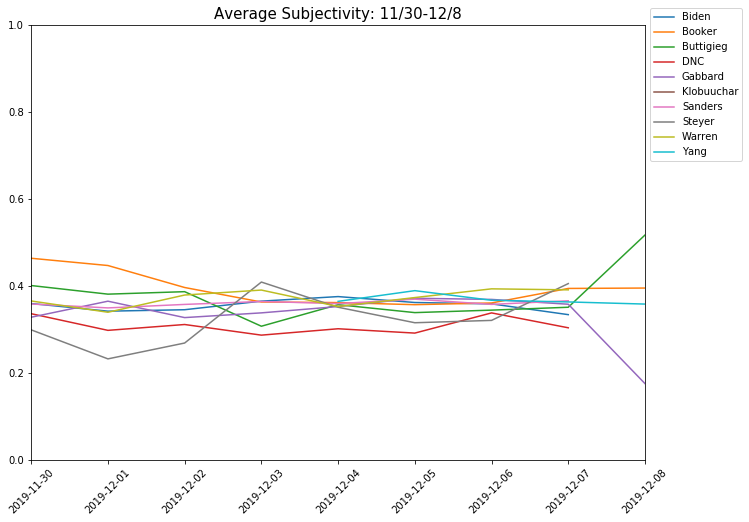

In [333]:
temp_term = ['day', 'candidate', 'subjectivity']
metric = 'mean'
print(dems['subjectivity'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(11,8))
plt.ylim(0.0, 1)
plt.xticks(rotation=45)
plt.title('Average Subjectivity: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_all.png')
plt.show()

del temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang

In [107]:
#dems['subjectivity'].describe()

In [285]:
# """plot"""
# # fig = plt.figure()
# # ax = plt.subplot(111)
# plt.figure()
# temp_dem.plot(kind='line', legend=False)
# plt.ylim(-0.5, 1)
# plt.xticks(rotation=45)
# plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
# plt.show()

In [286]:
time0 = time()
bins = np.arange(0, 1.1, 0.1)
#df['binned'] = 
dems['subjectivity_bins'] = pd.cut(dems['subjectivity'], bins=bins)#, labels=labels)
#dems['favorite_bins'] = pd.Series([str(dems['favorite_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()

dems.head(1)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num,polarity_bins,subjectivity_bins
0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6,"(-0.5, -0.4]","(0.6, 0.7]"


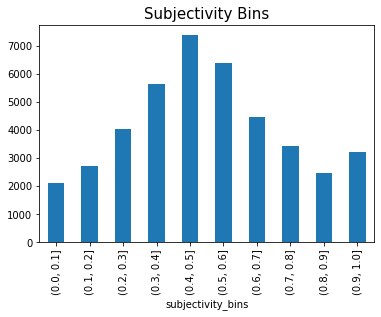

In [287]:
dems.groupby(['subjectivity_bins']).size().plot(kind='bar')
plt.title('Subjectivity Bins', fontsize=15)
plt.savefig('charts\\subjectivity_hist_all.png')
plt.show()

In [288]:
dems['subjectivity_bins'].value_counts()

(0.4, 0.5]    7376
(0.5, 0.6]    6395
(0.3, 0.4]    5618
(0.6, 0.7]    4452
(0.2, 0.3]    4030
(0.7, 0.8]    3438
(0.9, 1.0]    3216
(0.1, 0.2]    2701
(0.8, 0.9]    2476
(0.0, 0.1]    2103
Name: subjectivity_bins, dtype: int64

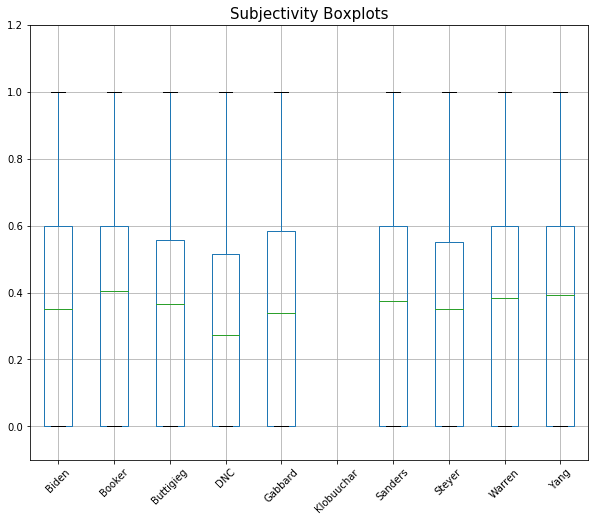

In [290]:
temp_term = ['subjectivity']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-0.1, 1.2)
plt.xticks(rotation=45)
plt.title('Subjectivity Boxplots'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_box_all.png')
plt.show()


## favorite count

count    60208.000000
mean        10.616679
std        171.787663
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      19606.000000
Name: favorite_count, dtype: float64


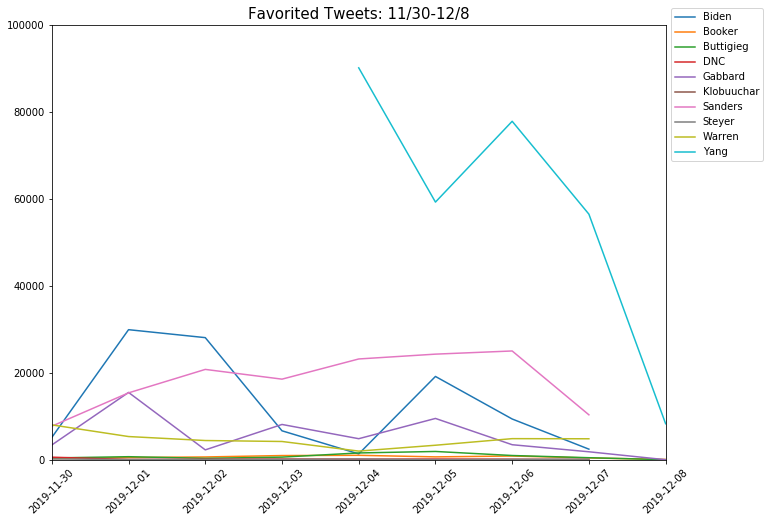

In [335]:
temp_term = ['day', 'candidate', 'favorite_count']
metric = 'sum'
print(dems['favorite_count'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(11,8))
plt.ylim(0.0, 100000)
plt.xticks(rotation=45)
plt.title('Favorited Tweets: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\favorite_all.png')
plt.show()

In [293]:
time0 = time()
bins = np.arange(0, 2000, 100)
#df['binned'] = 
dems['favorite_bins'] = pd.cut(dems['favorite_count'], bins=bins)#, labels=labels)
#dems['favorite_bins'] = pd.Series([str(dems['favorite_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()

dems.head(1)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num,polarity_bins,subjectivity_bins,favorite_bins
0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6,"(-0.5, -0.4]","(0.6, 0.7]",NaN


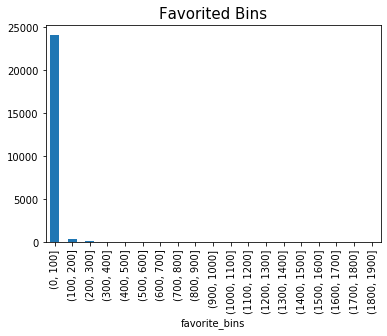

In [294]:
dems.groupby(['favorite_bins']).size().plot(kind='bar')
plt.title('Favorited Bins', fontsize=15)
plt.savefig('charts\\favorite_hist_all.png')
plt.show()

In [295]:
dems['favorite_bins'].value_counts().iloc[:10]

(0, 100]        24084
(100, 200]        340
(200, 300]        135
(300, 400]         63
(400, 500]         42
(500, 600]         41
(700, 800]         17
(600, 700]         16
(800, 900]         12
(1400, 1500]       10
Name: favorite_bins, dtype: int64

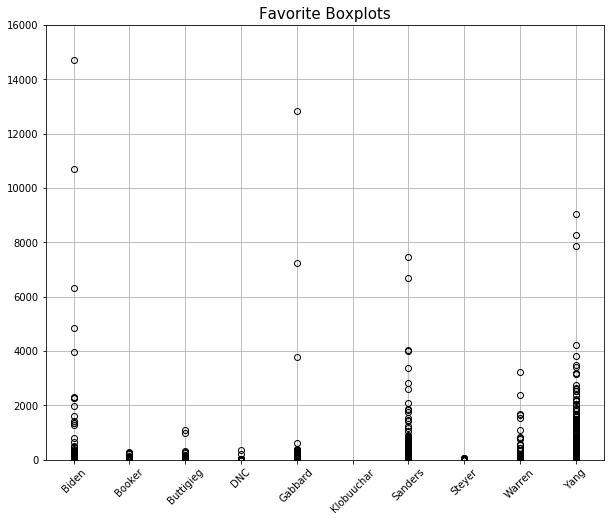

In [297]:
temp_term = ['favorite_count']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(0.0, 1.6e4)
plt.xticks(rotation=45)
plt.title('Favorite Boxplots'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\favorite_box_all')
plt.show()

## retweet count

count    60208.000000
mean        90.407089
std        521.743298
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max      17889.000000
Name: retweet_count, dtype: float64


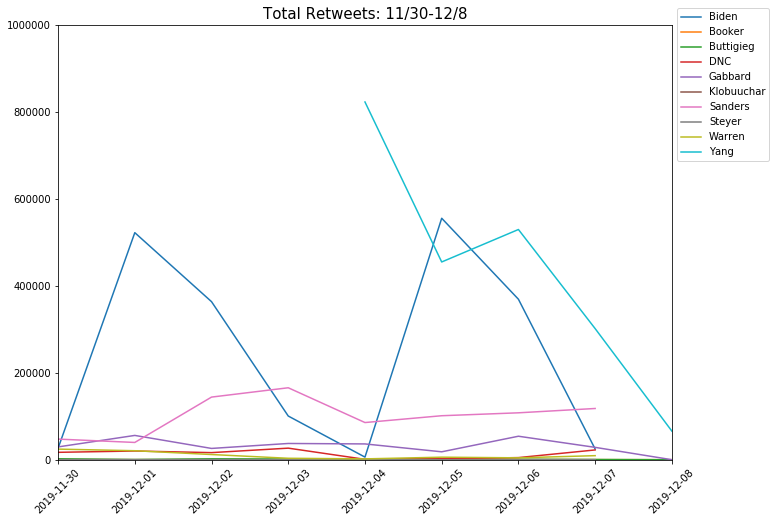

In [336]:
temp_term = ['day', 'candidate', 'retweet_count']
metric = 'sum'
print(dems['retweet_count'].describe())



temp_biden = biden[temp_term].groupby(['day']).agg(metric)
temp_booker = booker[temp_term].groupby(['day']).agg(metric)
temp_buttig = buttig[temp_term].groupby(['day']).agg(metric)
temp_dnc = dnc[temp_term].groupby(['day']).agg(metric)
temp_gabbard = gabbard[temp_term].groupby(['day']).agg(metric)
temp_klob = klob[temp_term].groupby(['day']).agg(metric)
temp_sanders = sanders[temp_term].groupby(['day']).agg(metric)
temp_steyer = steyer[temp_term].groupby(['day']).agg(metric)
temp_warren = warren[temp_term].groupby(['day']).agg(metric)
temp_yang = yang[temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.plot(kind='line', legend=False, figsize=(11,8))
plt.ylim(0.0, 1e6)
plt.xticks(rotation=45)
plt.title('Total Retweets: 11/30-12/8'.format(metric), fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\retweets_all.png')
plt.show()

In [337]:
time0 = time()
bins = np.arange(0, 18000, 1000)
#df['binned'] = 
dems['retweet_bins'] = pd.cut(dems['retweet_count'], bins=bins)#, labels=labels)
#dems['favorite_bins'] = pd.Series([str(dems['favorite_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()

dems.head(1)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num,polarity_bins,subjectivity_bins,favorite_bins,retweet_bins
0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6,"(-0.5, -0.4]","(0.6, 0.7]",NaN,NaN


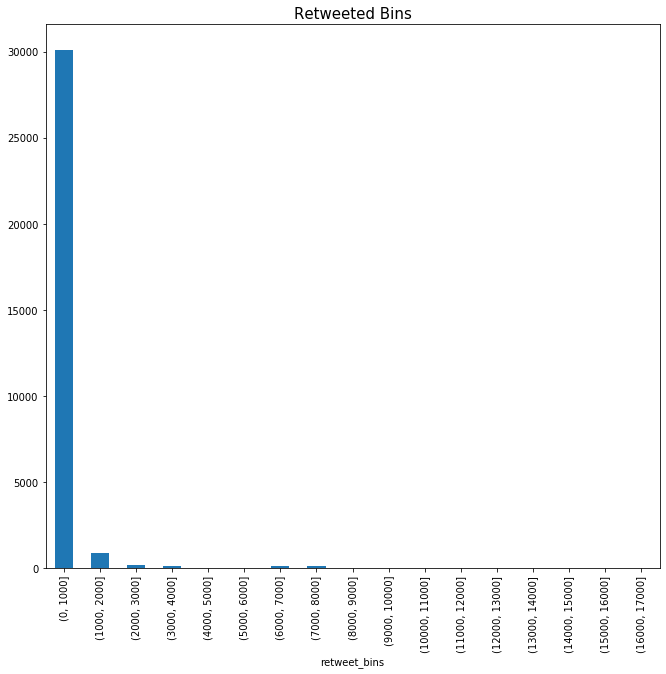

In [342]:
dems.groupby(['retweet_bins']).size().plot(kind='bar', figsize=(11,10))
plt.title('Retweeted Bins', fontsize=15)
plt.savefig('charts\\retweeted_hist_all.png')
plt.show()

In [311]:
dems['retweet_bins'].value_counts().iloc[:10]

(0, 500]        28951
(500, 1000]      1127
(1500, 2000]      625
(1000, 1500]      237
(6500, 7000]      114
(2500, 3000]      108
(7000, 7500]       98
(3500, 4000]       49
(3000, 3500]       47
(2000, 2500]       36
Name: retweet_bins, dtype: int64

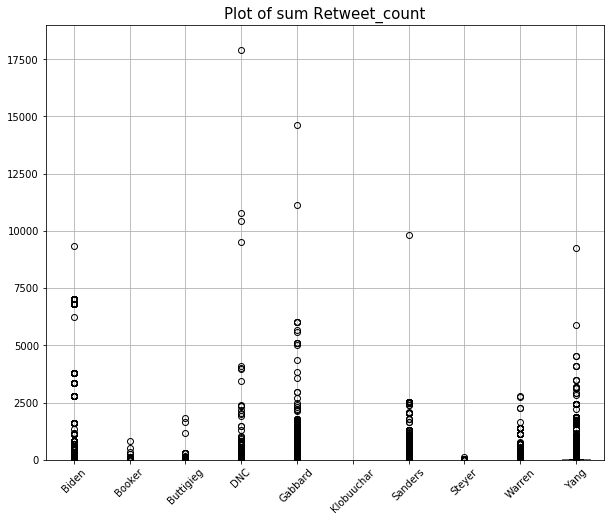

In [313]:
temp_term = ['retweet_count']

temp_biden = biden[temp_term]
temp_booker = booker[temp_term]
temp_buttig = buttig[temp_term]
temp_dnc = dnc[temp_term]
temp_gabbard = gabbard[temp_term]
temp_klob = klob[temp_term]
temp_sanders = sanders[temp_term]
temp_steyer = steyer[temp_term]
temp_warren = warren[temp_term]
temp_yang = yang[temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(0.0, 1.9e4)
plt.xticks(rotation=45)
plt.title('Plot of {} Retweet_count'.format(metric), fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\retweets_box_all.png')
plt.show()

#### Highly Retweeted DF

In [314]:
high_retweet = dems[(dems['retweet_count']>=6500)]# & (dems['retweet_count']<=7500)]
print(high_retweet.shape)
high_retweet.head(2)

(221, 17)


,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num,polarity_bins,subjectivity_bins,favorite_bins,retweet_bins
14909,2019-12-02 22:23:55+00:00,RT @NaomiAKlein: I’ve written about my prefere...,i ’ written preferences i never formally endor...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,0,9820,nan,NaomiAKlein,Sanders,2019-12-02,6,"(-2.22e-16, 0.1]",NaN,NaN,"(9500, 10000]"
31836,2019-12-04 03:03:21+00:00,RT @cryptogangz1: My mom is a boomer she's har...,my mom boomer 's hardcore she supported i told...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,0,9246,democrat,"cryptogangz1, JoeBiden, AndrewYang",Yang,2019-12-04,9,"(-2.22e-16, 0.1]",NaN,NaN,"(9000, 9500]"


In [315]:
high_retweet['candidate'].value_counts()

Biden      213
DNC          4
Gabbard      2
Yang         1
Sanders      1
Name: candidate, dtype: int64

#### Polarity

count    60208.000000
mean         0.118126
std          0.290073
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.255682
max          1.000000
Name: polarity, dtype: float64


<Figure size 432x288 with 0 Axes>

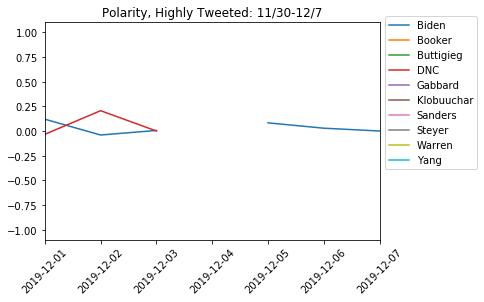

In [318]:
temp_term = ['day', 'candidate', 'polarity']
metric = 'mean'
print(dems['polarity'].describe())



temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term].groupby(['day']).agg(metric)
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term].groupby(['day']).agg(metric)
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term].groupby(['day']).agg(metric)
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term].groupby(['day']).agg(metric)
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term].groupby(['day']).agg(metric)
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term].groupby(['day']).agg(metric)
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term].groupby(['day']).agg(metric)
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term].groupby(['day']).agg(metric)
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term].groupby(['day']).agg(metric)
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
plt.figure()
temp_dem.plot(kind='line', legend=False)
plt.ylim(-1.1, 1.1)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.title('Polarity, Highly Tweeted: 11/30-12/7')
plt.savefig('charts\\polarity_high.png')
plt.show()

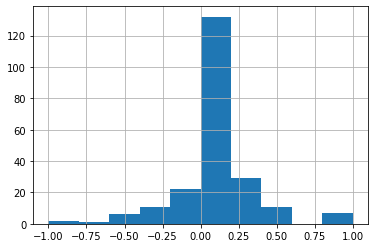

In [317]:
high_retweet['polarity'].hist(bins=10)

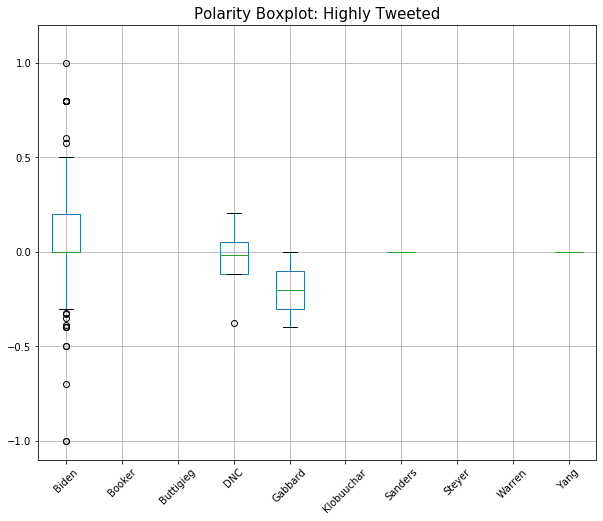

In [319]:
temp_term = ['polarity']

temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term]
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term]
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term]
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term]
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term]
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term]
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term]
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term]
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term]
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-1.1, 1.2)
plt.xticks(rotation=45)
plt.title('Polarity Boxplot: Highly Tweeted', fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.show()


#### Subjectitivty

count    60208.000000
mean         0.361935
std          0.314634
min          0.000000
25%          0.000000
50%          0.375000
75%          0.600000
max          1.000000
Name: subjectivity, dtype: float64


<Figure size 432x288 with 0 Axes>

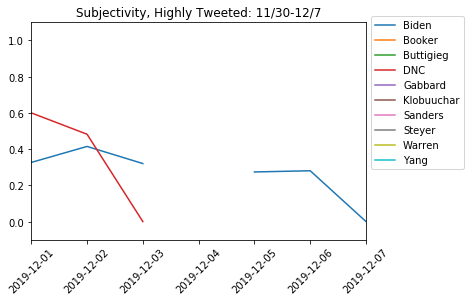

In [321]:
temp_term = ['day', 'candidate', 'subjectivity']
metric = 'mean'
print(dems['subjectivity'].describe())



temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term].groupby(['day']).agg(metric)
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term].groupby(['day']).agg(metric)
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term].groupby(['day']).agg(metric)
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term].groupby(['day']).agg(metric)
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term].groupby(['day']).agg(metric)
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term].groupby(['day']).agg(metric)
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term].groupby(['day']).agg(metric)
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term].groupby(['day']).agg(metric)
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term].groupby(['day']).agg(metric)
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
plt.figure()
temp_dem.plot(kind='line', legend=False)
plt.ylim(-0.1, 1.1)
plt.xticks(rotation=45)
plt.title('Subjectivity, Highly Tweeted: 11/30-12/7')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_hist_high.png')
plt.show()

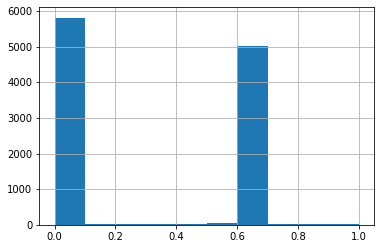

In [236]:
high_retweet['subjectivity'].hist(bins=10)

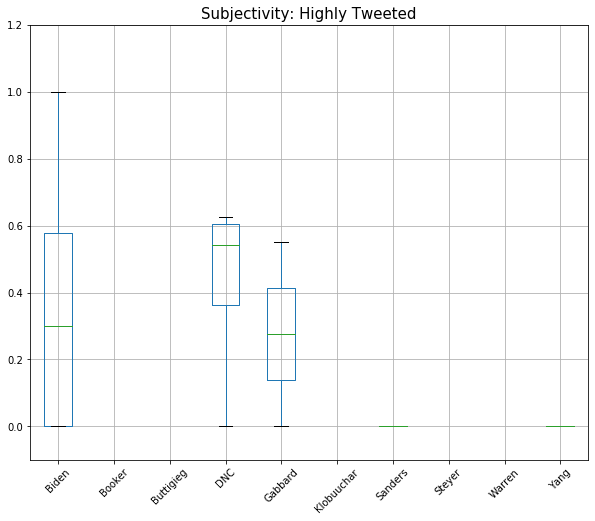

In [322]:
temp_term = ['subjectivity']

temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term]
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term]
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term]
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term]
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term]
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term]
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term]
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term]
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term]
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-0.1, 1.2)
plt.xticks(rotation=45)
plt.title('Subjectivity: Highly Tweeted', fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\subjectivity_box_high.png')
plt.show()


#### Favorites

count    60208.000000
mean        10.616679
std        171.787663
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      19606.000000
Name: favorite_count, dtype: float64


<Figure size 432x288 with 0 Axes>

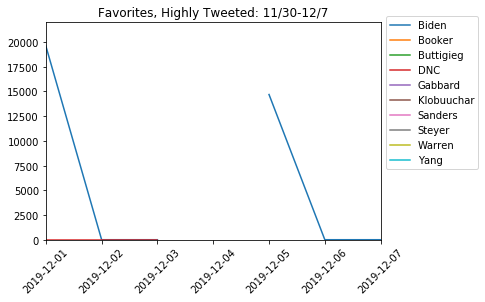

In [323]:
temp_term = ['day', 'candidate', 'favorite_count']
metric = 'sum'
print(dems['favorite_count'].describe())



temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term].groupby(['day']).agg(metric)
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term].groupby(['day']).agg(metric)
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term].groupby(['day']).agg(metric)
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term].groupby(['day']).agg(metric)
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term].groupby(['day']).agg(metric)
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term].groupby(['day']).agg(metric)
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term].groupby(['day']).agg(metric)
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term].groupby(['day']).agg(metric)
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term].groupby(['day']).agg(metric)
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term].groupby(['day']).agg(metric)
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
plt.figure()
temp_dem.plot(kind='line', legend=False)
plt.ylim(-0.1, 22000)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.title('Favorites, Highly Tweeted: 11/30-12/7')
plt.savefig('charts\\favorites_high.png')
plt.show()

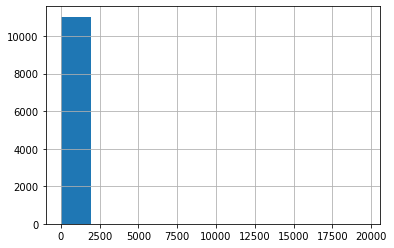

In [240]:
high_retweet['favorite_count'].hist()

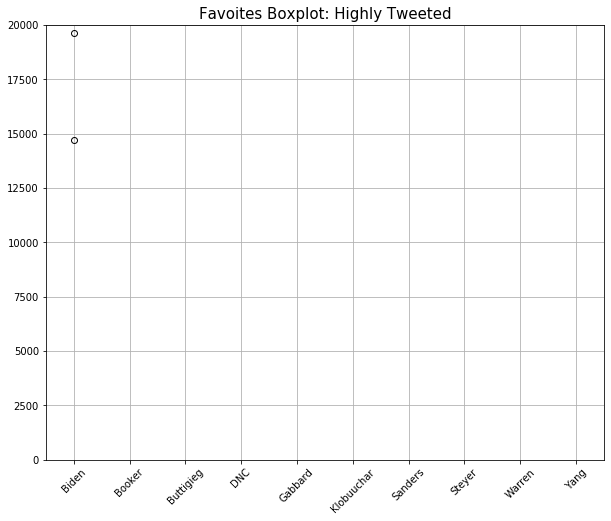

In [324]:
temp_term = ['favorite_count']

temp_biden = high_retweet[high_retweet['candidate']=='Biden'][temp_term]
temp_booker = high_retweet[high_retweet['candidate']=='Booker'][temp_term]
temp_buttig = high_retweet[high_retweet['candidate']=='Buttigieg'][temp_term]
temp_dnc = high_retweet[high_retweet['candidate']=='DNC'][temp_term]
temp_gabbard = high_retweet[high_retweet['candidate']=='Gabbard'][temp_term]
temp_klob = high_retweet[high_retweet['candidate']=='Klobuchar'][temp_term]
temp_sanders = high_retweet[high_retweet['candidate']=='Sanders'][temp_term]
temp_steyer = high_retweet[high_retweet['candidate']=='Steyer'][temp_term]
temp_warren = high_retweet[high_retweet['candidate']=='Warren'][temp_term]
temp_yang = high_retweet[high_retweet['candidate']=='Yang'][temp_term]
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list


"""plot"""
# fig = plt.figure()
# ax = plt.subplot(111)
#plt.figure()
temp_dem.boxplot(figsize=(10,8))
plt.ylim(-0.1, 20000)
plt.xticks(rotation=45)
plt.title('Favoites Boxplot: Highly Tweeted', fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
plt.savefig('charts\\favorite_box_high.png')
plt.show()


In [325]:
high_retweet['retweet_bins'].value_counts().iloc[:6]

(6500, 7000]      114
(7000, 7500]       98
(9000, 9500]        2
(9500, 10000]       2
(11000, 11500]      1
(14500, 15000]      1
Name: retweet_bins, dtype: int64

In [248]:
high_retweet.to_csv('high_retweet.csv')

In [245]:
temp_term = ['day', 'candidate', 'favorite_count']

In [246]:
temp_biden = biden[temp_term].groupby(['day']).agg('sum')
temp_booker = booker[temp_term].groupby(['day']).agg('sum')
temp_buttig = buttig[temp_term].groupby(['day']).agg('sum')
temp_dnc = dnc[temp_term].groupby(['day']).agg('sum')
temp_gabbard = gabbard[temp_term].groupby(['day']).agg('sum')
temp_klob = klob[temp_term].groupby(['day']).agg('sum')
temp_sanders = sanders[temp_term].groupby(['day']).agg('sum')
temp_steyer = steyer[temp_term].groupby(['day']).agg('sum')
temp_warren = warren[temp_term].groupby(['day']).agg('sum')
temp_yang = yang[temp_term].groupby(['day']).agg('sum')
"""concatenate"""
temp_dem = pd.concat([temp_biden, temp_booker, temp_buttig, temp_dnc, temp_gabbard,temp_klob, temp_sanders, temp_steyer, temp_warren, temp_yang], axis=1, sort=False)
temp_dem.columns = cand_list

temp_dem

,Biden,Booker,Buttigieg,DNC,Gabbard,Klobuuchar,Sanders,Steyer,Warren,Yang
2019-11-30,18999.0,299,424,587.0,3815,NaN,11425.0,200.0,10669.0,NaN
2019-12-01,35956.0,508,697,65.0,15763,NaN,17949.0,92.0,12370.0,NaN
2019-12-02,34248.0,918,430,112.0,3392,NaN,28644.0,126.0,8404.0,NaN
2019-12-03,8500.0,1009,741,162.0,9330,NaN,34938.0,103.0,4869.0,NaN
2019-12-04,4812.0,2587,1818,134.0,7355,NaN,25139.0,163.0,2566.0,139625.0
2019-12-05,22450.0,766,1969,361.0,11125,NaN,39987.0,38.0,5796.0,93314.0
2019-12-06,13904.0,1010,1006,127.0,13247,NaN,29439.0,133.0,5645.0,110783.0
2019-12-07,3174.0,835,524,279.0,2175,NaN,16133.0,133.0,5228.0,76330.0
2019-12-08,NaN,73,0,NaN,0,NaN,NaN,NaN,NaN,13369.0


In [48]:
# dems.groupby('polarity_bins').size()

In [62]:
# dems_red = dems[(dems['polarity_bins'] != '(-0.1, -2.22e-16]') & (dems['polarity_bins'] != '(-2.22e-16, 0.1]')]
# del dems_red

In [ ]:
# s = df.groupby(pd.cut(df['percentage'], bins=bins)).size()

In [103]:
# plt.hist(dems['polarity'], bins=100)
# plt.show()

In [104]:
# plt.hist(dems['subjectivity'], bins=100)
# plt.show()

In [105]:
dems['favorite_count'].value_counts().sort_values()

1255         1
282          1
794          1
283          1
539          1
         ...  
4         2051
3         3104
2         5147
1        10186
0       232075
Name: favorite_count, Length: 655, dtype: int64

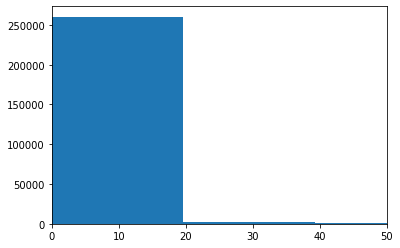

In [113]:
plt.hist(dems['favorite_count'], bins=1000)
plt.xlim(0,50)
plt.show()

In [74]:
dems[dems['favorite_count']!=0].shape

(32331, 12)

In [139]:
time0 = time()
bins = np.arange(0, 1300, 100)
#df['binned'] = 
dems['favorite_bins'] = pd.cut(dems['favorite_count'], bins=bins)#, labels=labels)
#dems['favorite_bins'] = pd.Series([str(dems['favorite_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()

dems.head(1)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,favorite_bins
10596,Sat Dec 07 20:25:26 +0000 2019,RT @mumbleprince: Hey #YangGang I’m living in ...,hey i ’ living va extremely red county 87 dist...,"Sentiment(polarity=0.08333333333333333, subjec...",0.083333,0.144444,0,148,yanggang,mumbleprince,Yang,NaN


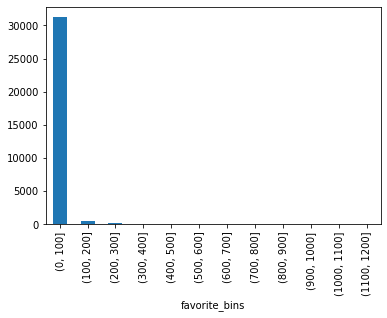

In [143]:
dems[dems['favorite_count']>=0].groupby(['favorite_bins']).size().plot(kind='bar')
plt.show()

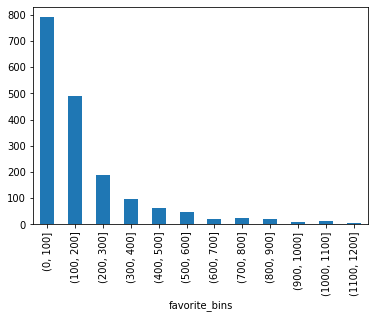

In [142]:
dems[dems['favorite_count']>50].groupby(['favorite_bins']).size().plot(kind='bar')
plt.show()

In [144]:
#plt.plot(dems['favorite_bins'].value_counts().index, )

In [145]:
# #temp_df = dems[dems['favorite_count']>20]
# plt.hist(dems['favorite_bins'])
# #plt.xlim(0, 1300)
# #plt.title('length of df{}\nproportion of original {}'.format(len(temp_df), round(len(temp_df)/len(dems)), 4))
# plt.show()

In [153]:
time0 = time()
bins = np.arange(0, 10000, 100)
#df['binned'] = 
dems['retweet_bins'] = pd.cut(dems['retweet_count'], bins=bins)#, labels=labels)
#dems['favorite_bins'] = pd.Series([str(dems['favorite_bins'].iloc[i]) for i in range(len(dems))])
# labels = [1,2,3,4,5,6]
time1 = time()

dems.head(1)

,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,favorite_bins,retweet_bins
10596,Sat Dec 07 20:25:26 +0000 2019,RT @mumbleprince: Hey #YangGang I’m living in ...,hey i ’ living va extremely red county 87 dist...,"Sentiment(polarity=0.08333333333333333, subjec...",0.083333,0.144444,0,148,yanggang,mumbleprince,Yang,NaN,"(100, 200]"


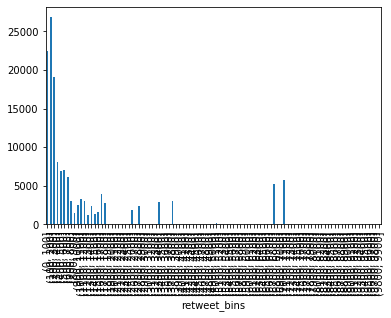

In [154]:
dems[dems['retweet_count']>50].groupby(['retweet_bins']).size().plot(kind='bar')
plt.show()

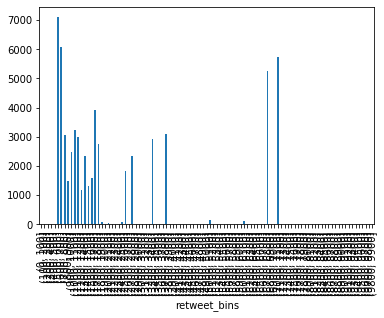

In [155]:
dems[dems['retweet_count']>500].groupby(['retweet_bins']).size().plot(kind='bar')
plt.show()

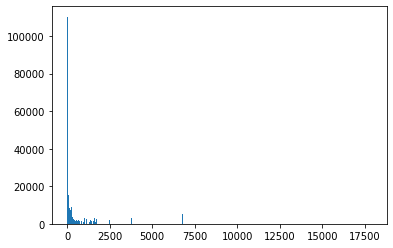

In [158]:
plt.hist(dems['retweet_count'], bins=500)
plt.show()

In [ ]:
"""if we split the data up into say, 10 bins, and then 1000 bins
bick that crazy bin with over 1000 bins, is there any interesting sentiments?"""

In [163]:
#dems[dems['retweet_count']>50].groupby(['retweet_bins']).size().sort_values(ascending=False).iloc[:50]

In [170]:
str(dems['retweet_bins'].iloc[0]) == '(100, 200]'

True

In [169]:
dems[str(dems['retweet_bins'])=='(7000, 7100]'] 

KeyError: False